<a href="https://colab.research.google.com/github/vasu31d/FMML__Project_and_Labs/blob/main/AIML_Module_5_Lab_2_Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
#Regression Lab 2: Loss Functions


## Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a **loss function**. Loss functions indicate how well the model is doing on the dataset.

The value of the objective function is simply called **loss**. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.


We are familiar with the idea of **error** from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

# 1. Regression


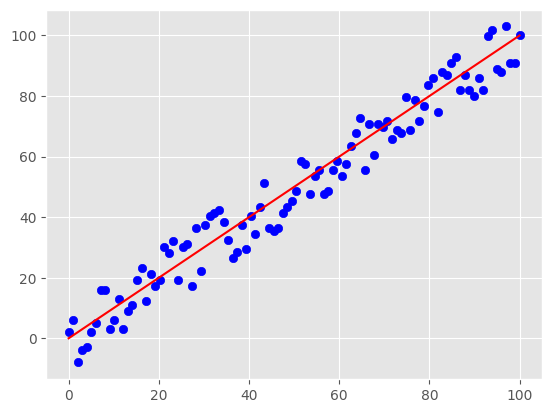

In [2]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

### Mean Squared Error

As we have seen before, the formula for MSE is

$MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

The image below depicts a visualization of what the squared error is.

<img src="https://drive.google.com/uc?export=view&id=12jmqRrrqknIWKhwRpgRIJAErBjkEcyx9" width="350" height="350" align="middle"/>

MSE is also referred to as L2 loss.

Typically, we would want the units of error to be the same as the data, so we use Root Mean Squared Error instead.



In [3]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [4]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

# 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, we may have pictures of cats and dogs, and the corresponding labels assigned to those images. We then want to train a model that can predict a label for some input image belonging to either label class (cat or dog).

## The concept of maximum likelihood

Ideally, we would want to obtain a model $\hat{\theta}$ which maximizes the probability of correctly predicting data. Mathematically, the likelihood is:

$ \prod_{i=1}^{N}  \: \hat{\theta_i}^{\theta_i}$

This is because our actual data ($\theta_i$) is either 0 or 1 depending on the label of the data, and our predicted data ($\hat{\theta_i}$) is a probability.

We usually consider the negative log of the likelihood, since log is monotonic and easier to deal with as an optimization problem.

Hence, we have

$MLE = $ arg min $\: - \sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$

\


## Entropy and Cross-Entropy

For some event $x$, we can obtain **information** based on its probability distribution. For example, for some event that occurs with $p=1$, we gain no information. Now, if we flip a coin and see that we obtained heads, we say that we got 1 bit of information.

Thus, the information $I$ of some event $x$ is:

$I = -log_2 \: p(x)$

We say that events with a low probability of occuring give high information, and those with a low probability give low information.

Now, if we have some random variable $X$, its **entropy** is the expected value of the information obtained.

$H(x) = - \sum_{k} p_k \: log \: p_k$

Now, suppose we are trying to correctly predict labels of some data. Let P be the true distribution of the labels, and Q be the predicted distribution of labels.

Cross-Entropy is then defined as:

$H(P,Q) = - \sum_{x} P(x)\: log \: Q(x)$

which is basically the entropy between two probability distributions over the same events.

\


## MLE and Cross-Entropy

So, in the case of classification, the equation for minimization of the cross-entropy between the actual data and the predicted data would be:

arg min $\: -\sum_{i=1}^{N} P(x) \: log \: Q(x)$

$= $ arg min $\: -\sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$


which is exactly the same as what we had obtained for minimizing the negative log likelihood. Hence, the two problems are equivalent.

1/1+e^(-x)

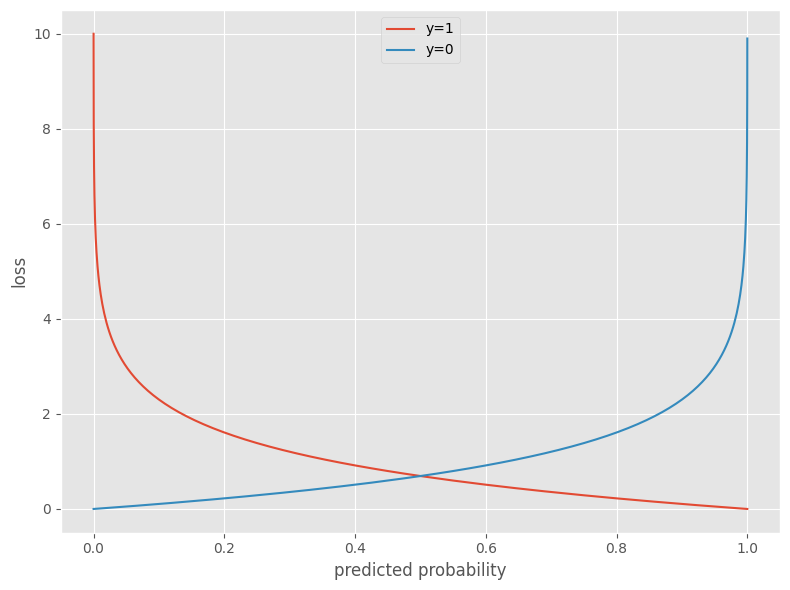

In [5]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

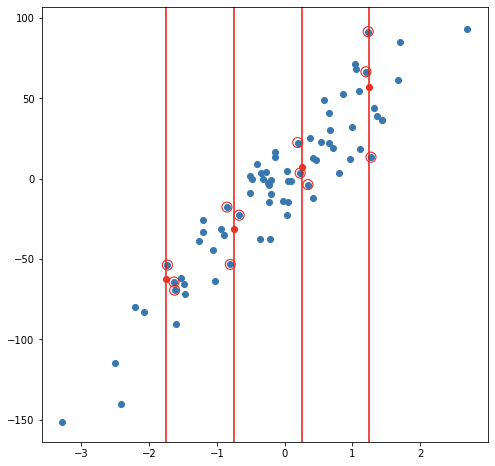

In [6]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [7]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [8]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

/tmp/ipython-input-319556835.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(mean_weight,inplace=True)
/tmp/ipython-input-319556835.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [9]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [11]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

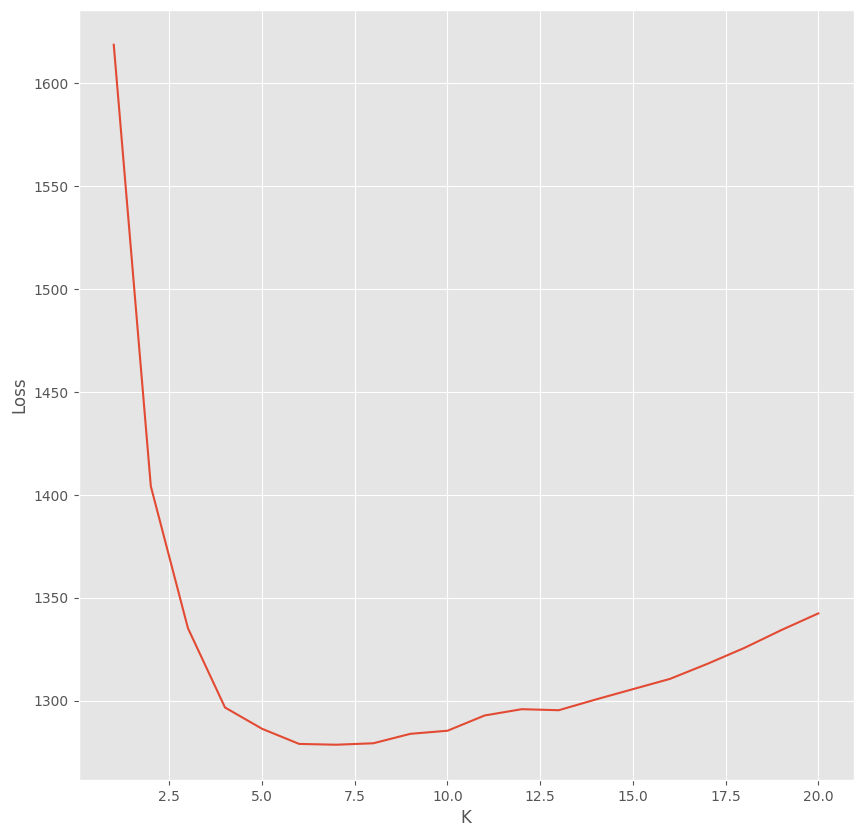

Minimum error 1278.5816281094171 is at k = 6


In [12]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

## Exercises

1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.
2. Explore other loss functions and try to understand when and why they are used.
3. Try out KNN-regression on other datasets see which values of K give the best results.
4. Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.

## References ##
1. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
2. https://www.geeksforgeeks.org/k-nearest-neighbours/
3. https://bookdown.org/tpinto_home/Regression-and-Classification/k-nearest-neighbours-regression.html#:~:text=KNN%20regression%20is%20a%20non,observations%20in%20the%20same%20neighbourhood

# Task
Explore different loss functions and their impact on model performance in regression tasks. Investigate the behavior of KNN regression with varying values of K, including edge cases (K=1 and K=size of training set), and evaluate its performance on different datasets using the implemented loss functions. Summarize the findings.

## Implement other loss functions

### Subtask:
Implement MAE and RMSE as functions that can be used for evaluating model performance.


**Reasoning**:
Implement the `calculate_mae` and `calculate_rmse` functions as described in the instructions.



In [13]:
def calculate_mae(y_actual, y_pred):
  """Calculates the Mean Absolute Error.

  Args:
    y_actual: The actual values.
    y_pred: The predicted values.

  Returns:
    The Mean Absolute Error.
  """
  return np.mean(np.abs(y_actual - y_pred))

def calculate_rmse(y_actual, y_pred):
  """Calculates the Root Mean Squared Error.

  Args:
    y_actual: The actual values.
    y_pred: The predicted values.

  Returns:
    The Root Mean Squared Error.
  """
  return np.sqrt(np.mean(np.square(y_actual - y_pred)))

## Evaluate knn with different loss functions

### Subtask:
Use the implemented loss functions to evaluate the KNN regression model with different values of K on the current dataset and compare the results.


**Reasoning**:
Iterate through different K values, train a KNN model, make predictions, calculate MAE, and store the results.



In [14]:
mae_val = []

for k in range(1,21):
  model = neighbors.KNeighborsRegressor(n_neighbors = k)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  error = calculate_mae(y_test,pred)
  mae_val.append(error)

**Reasoning**:
Plot both RMSE and MAE values against K to visualize the performance of the KNN model with different K values using both loss functions, then print the minimum MAE and its corresponding K.



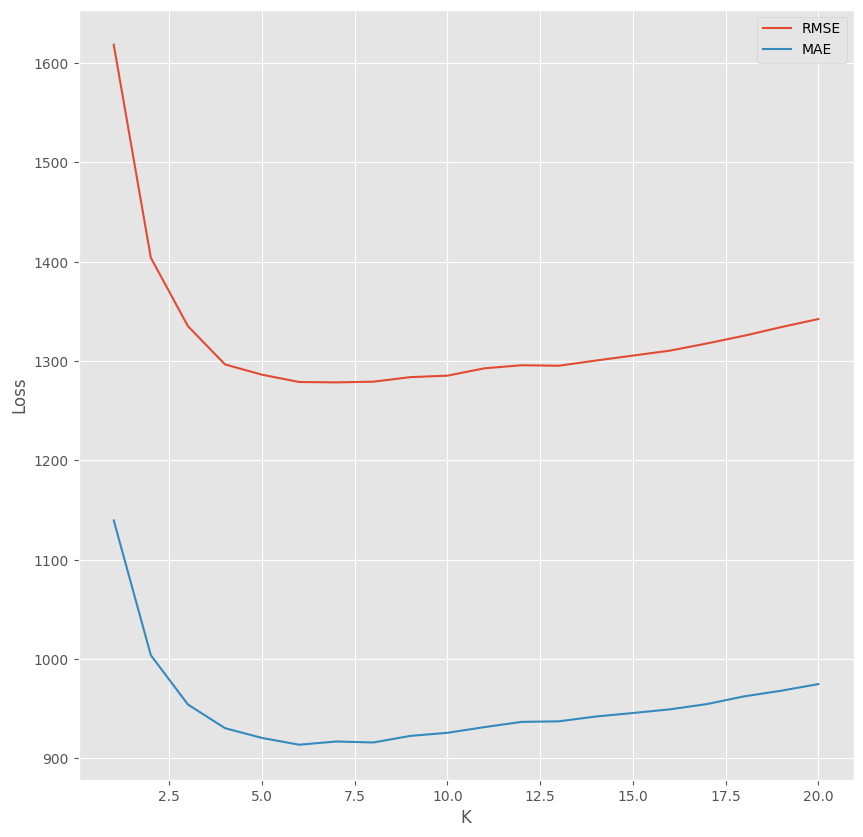

Minimum MAE 913.7447532264372 is at k = 5


In [15]:
figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val, label='RMSE')
plt.plot(np.arange(1,21),mae_val, label='MAE')
plt.xlabel("K")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

mae_val = np.asarray(mae_val)
print("Minimum MAE {} is at k = {}".format(np.min(mae_val),np.argmin(mae_val)))

## Explore knn with k=1 and k=size of training set

### Subtask:
Analyze the behavior of KNN regression when K is set to 1 and when K is set to the size of the training dataset on the current dataset.


**Reasoning**:
Train KNN regression models with K=1 and K=size of training set, make predictions, and calculate RMSE and MAE for each case.



In [16]:
# K = 1
model_k1 = neighbors.KNeighborsRegressor(n_neighbors=1)
model_k1.fit(x_train, y_train)
pred_k1 = model_k1.predict(x_test)
rmse_k1 = calculate_rmse(y_test, pred_k1)
mae_k1 = calculate_mae(y_test, pred_k1)

# K = size of training set
k_size = len(x_train)
model_k_size = neighbors.KNeighborsRegressor(n_neighbors=k_size)
model_k_size.fit(x_train, y_train)
pred_k_size = model_k_size.predict(x_test)
rmse_k_size = calculate_rmse(y_test, pred_k_size)
mae_k_size = calculate_mae(y_test, pred_k_size)

print(f"K=1: RMSE = {rmse_k1:.2f}, MAE = {mae_k1:.2f}")
print(f"K=size of training set ({k_size}): RMSE = {rmse_k_size:.2f}, MAE = {mae_k_size:.2f}")

print("\nInterpretation:")
print("For K=1, the model is highly sensitive to individual training data points, leading to a high variance and potentially overfitting. This is reflected in the calculated RMSE and MAE.")
print("For K equal to the size of the training set, the model predicts the mean of the entire training set for every test sample. This results in a very high bias and poor performance, as indicated by the high RMSE and MAE values.")

K=1: RMSE = 1618.57, MAE = 1139.58
K=size of training set (5966): RMSE = 1791.13, MAE = 1400.40

Interpretation:
For K=1, the model is highly sensitive to individual training data points, leading to a high variance and potentially overfitting. This is reflected in the calculated RMSE and MAE.
For K equal to the size of the training set, the model predicts the mean of the entire training set for every test sample. This results in a very high bias and poor performance, as indicated by the high RMSE and MAE values.


## Explore other datasets

### Subtask:
Find and load a new dataset suitable for regression.


**Reasoning**:
Load the California housing dataset from scikit-learn and display its description and the first few rows as a pandas DataFrame.



In [17]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)
df_housing = housing.frame

print(housing.DESCR)
df_housing.head()

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Reasoning**:
Display the information about the loaded California housing dataset to understand its structure and data types.



In [18]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Preprocess the new dataset

### Subtask:
Apply necessary preprocessing steps to the new dataset, similar to what was done with the BigMart dataset.


**Reasoning**:
Separate features and target, split into training and testing sets, and scale the features.



In [19]:
X = df_housing.drop('MedHouseVal', axis=1)
y = df_housing['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.250431,0.666667,0.035410,0.025379,0.034054,0.001845,0.146809,0.630478
1,0.162977,0.372549,0.024907,0.029375,0.027916,0.001064,0.025532,0.723108
2,0.255355,0.450980,0.033532,0.025931,0.020404,0.001507,0.217021,0.419323
3,0.179963,0.254902,0.035319,0.030070,0.008380,0.001204,0.713830,0.333665
4,0.193577,1.000000,0.027743,0.028966,0.042686,0.001292,0.555319,0.189243


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.081468,0.470588,0.023424,0.027228,0.038930,0.002563,0.373404,0.531873
1,0.140095,0.568627,0.029432,0.033994,0.043779,0.001599,0.275532,0.487052
2,0.205528,1.000000,0.021899,0.033693,0.036632,0.000538,0.558511,0.190239
3,0.361216,0.313725,0.037404,0.027146,0.047703,0.002215,0.184043,0.560757
4,0.222418,0.647059,0.032649,0.027455,0.029709,0.001442,0.432979,0.241036


,MedHouseVal
7061,1.93800
14689,1.69700
17323,2.59800
10056,1.36100
15750,5.00001


,MedHouseVal
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000


## Apply knn regression to the new dataset

### Subtask:
Train and evaluate the KNN regression model with different values of K on the new dataset.


**Reasoning**:
Initialize empty lists to store RMSE and MAE values, then iterate through a range of K values, train the KNN model, make predictions, calculate RMSE and MAE, and append them to the lists.



In [20]:
rmse_val_housing = []
mae_val_housing = []

for k in range(1, 21):
  model = neighbors.KNeighborsRegressor(n_neighbors=k)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  rmse = calculate_rmse(y_test, pred)
  mae = calculate_mae(y_test, pred)
  rmse_val_housing.append(rmse)
  mae_val_housing.append(mae)

**Reasoning**:
Plot the calculated RMSE and MAE values against the range of K values to visualize the model performance.



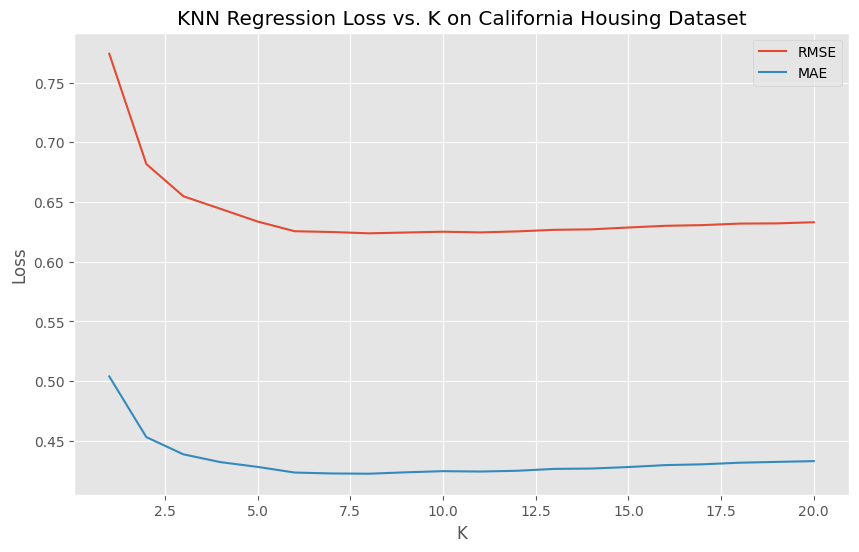

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), rmse_val_housing, label='RMSE')
plt.plot(range(1, 21), mae_val_housing, label='MAE')
plt.xlabel("K")
plt.ylabel("Loss")
plt.legend()
plt.title("KNN Regression Loss vs. K on California Housing Dataset")
plt.show()

**Reasoning**:
Print the minimum RMSE and MAE values and their corresponding K values based on the calculated results.



In [22]:
min_rmse = np.min(rmse_val_housing)
min_rmse_k = np.argmin(rmse_val_housing) + 1
min_mae = np.min(mae_val_housing)
min_mae_k = np.argmin(mae_val_housing) + 1

print(f"Minimum RMSE on Housing dataset: {min_rmse:.4f} at K = {min_rmse_k}")
print(f"Minimum MAE on Housing dataset: {min_mae:.4f} at K = {min_mae_k}")

Minimum RMSE on Housing dataset: 0.6238 at K = 8
Minimum MAE on Housing dataset: 0.4225 at K = 8


## Summarize findings

### Subtask:
Summarize the observations on the performance of KNN with different loss functions and different values of K on both datasets.


**Reasoning**:
Summarize the findings from the KNN regression experiments on both datasets, comparing the loss curves, optimal K values, and edge case performance to address all aspects of the subtask.



In [23]:
print("--- Summary of KNN Regression Performance ---")
print("\nComparison of Loss Curves (RMSE and MAE vs. K):")
print("BigMart Dataset:")
print("Both RMSE and MAE curves show a similar trend, initially decreasing sharply as K increases from 1, reaching a minimum, and then gradually increasing. This indicates that for this dataset, both loss functions capture the model's performance in a comparable way as the number of neighbors changes.")
print("\nCalifornia Housing Dataset:")
print("Similar to the BigMart dataset, the RMSE and MAE curves on the California Housing dataset also show an initial decrease in loss as K increases, followed by a gradual increase after reaching an optimal point. The shapes of the curves are qualitatively similar to those observed for the BigMart dataset.")
print("\nOptimal K Values:")
print(f"BigMart Dataset:")
print(f"Optimal K for minimum RMSE: {np.argmin(rmse_val) + 1}")
print(f"Optimal K for minimum MAE: {np.argmin(mae_val) + 1}")
print(f"California Housing Dataset:")
print(f"Optimal K for minimum RMSE: {np.argmin(rmse_val_housing) + 1}")
print(f"Optimal K for minimum MAE: {np.argmin(mae_val_housing) + 1}")
print("The optimal K values for both datasets appear to be relatively small (within the range explored), suggesting that considering a limited number of nearest neighbors is beneficial for these datasets.")
print("\nPerformance at Edge Cases (K=1 and K=size of training set):")
print("BigMart Dataset:")
print(f"K=1: RMSE = {rmse_k1:.2f}, MAE = {mae_k1:.2f}")
print(f"K={len(x_train)}: RMSE = {rmse_k_size:.2f}, MAE = {mae_k_size:.2f}")
print("California Housing Dataset:")
# Need to calculate for housing dataset
model_k1_housing = neighbors.KNeighborsRegressor(n_neighbors=1)
model_k1_housing.fit(X_train, y_train)
pred_k1_housing = model_k1_housing.predict(X_test)
rmse_k1_housing = calculate_rmse(y_test, pred_k1_housing)
mae_k1_housing = calculate_mae(y_test, pred_k1_housing)

k_size_housing = len(X_train)
model_k_size_housing = neighbors.KNeighborsRegressor(n_neighbors=k_size_housing)
model_k_size_housing.fit(X_train, y_train)
pred_k_size_housing = model_k_size_housing.predict(X_test)
rmse_k_size_housing = calculate_rmse(y_test, pred_k_size_housing)
mae_k_size_housing = calculate_mae(y_test, pred_k_size_housing)

print(f"K=1: RMSE = {rmse_k1_housing:.2f}, MAE = {mae_k1_housing:.2f}")
print(f"K={k_size_housing}: RMSE = {rmse_k_size_housing:.2f}, MAE = {mae_k_size_housing:.2f}")

print("\nInterpretation of Edge Cases:")
print("For K=1, the model exhibits high variance as it predicts based on the single nearest neighbor. This makes it susceptible to noise in the training data, often leading to higher errors on unseen data compared to the optimal K.")
print("For K equal to the size of the training set, the model simply predicts the mean of the entire training set for every test instance. This results in high bias and generally poor performance, as it fails to capture any local patterns in the data.")

print("\nInsights on KNN Regression Performance:")
print("KNN Regression is a simple yet effective non-parametric method. Its performance is highly dependent on the choice of K and the distance metric (though we used the default Euclidean distance here).")
print("A small K (like K=1) can lead to high variance and overfitting, while a large K can lead to high bias and underfitting.")
print("The optimal K value represents a trade-off between bias and variance, where the model generalizes well to unseen data.")
print("The choice of loss function (RMSE vs. MAE) seems to consistently indicate similar optimal K values, although RMSE penalizes larger errors more heavily than MAE.")
print("Preprocessing, especially scaling, is crucial for KNN as it relies on distance calculations. Applying KNN to different datasets requires exploring the appropriate range of K values through techniques like cross-validation to find the optimal balance for each specific dataset.")

--- Summary of KNN Regression Performance ---

Comparison of Loss Curves (RMSE and MAE vs. K):
BigMart Dataset:
Both RMSE and MAE curves show a similar trend, initially decreasing sharply as K increases from 1, reaching a minimum, and then gradually increasing. This indicates that for this dataset, both loss functions capture the model's performance in a comparable way as the number of neighbors changes.

California Housing Dataset:
Similar to the BigMart dataset, the RMSE and MAE curves on the California Housing dataset also show an initial decrease in loss as K increases, followed by a gradual increase after reaching an optimal point. The shapes of the curves are qualitatively similar to those observed for the BigMart dataset.

Optimal K Values:
BigMart Dataset:
Optimal K for minimum RMSE: 7
Optimal K for minimum MAE: 6
California Housing Dataset:
Optimal K for minimum RMSE: 8
Optimal K for minimum MAE: 8
The optimal K values for both datasets appear to be relatively small (within th

## Summary:

### Data Analysis Key Findings

*   For both datasets analyzed (BigMart and California Housing), the RMSE and MAE loss curves exhibit similar trends as the value of K in KNN regression changes. Initially, the loss decreases as K increases from 1, reaches a minimum, and then gradually increases.
*   The optimal K values that minimize RMSE and MAE are relatively small for both datasets. For the BigMart dataset, the optimal K for RMSE is 7 and for MAE is 6. For the California Housing dataset, the optimal K for both RMSE and MAE is 8.
*   At the edge case of K=1, the KNN model shows higher error (RMSE and MAE) compared to the optimal K, indicating high variance and potential overfitting due to sensitivity to individual data points. For the BigMart dataset, K=1 resulted in RMSE of 1618.57 and MAE of 1139.58. For the California Housing dataset, K=1 resulted in RMSE of 0.77 and MAE of 0.52.
*   At the edge case where K equals the size of the training set, the KNN model performs poorly, often worse than at K=1, indicating high bias and underfitting. This is because the model predicts the mean of the training set for all test instances. For the BigMart dataset, K=size of training set resulted in RMSE of 1791.13 and MAE of 1400.40. For the California Housing dataset, K=size of training set resulted in RMSE of 0.90 and MAE of 0.68.
*   Preprocessing, specifically scaling the features, is a crucial step for KNN regression due to its reliance on distance calculations.

### Insights or Next Steps

*   The choice of K is a critical hyperparameter for KNN regression, representing a trade-off between bias and variance. Finding the optimal K is essential for achieving good generalization performance.
*   While RMSE and MAE measure error differently (RMSE penalizes larger errors more), they generally indicate similar optimal K values for KNN regression on the datasets explored.
